In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cust_test_data=pd.read_csv('/content/customer_churn_data.csv')

In [3]:
cust_test_data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
cust_test_data.shape

(1000, 10)

In [5]:
cust_test_data.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'], dtype=object)

In [6]:
cust_test_data.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Tenure,int64
MonthlyCharges,float64
ContractType,object
InternetService,object
TotalCharges,float64
TechSupport,object
Churn,object


In [7]:
cust_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [8]:
cust_test_data.isna().sum().sum()

np.int64(297)

In [9]:
cust_test_data['InternetService']=cust_test_data['InternetService'].fillna("")

In [10]:
cust_test_data.isna().sum().sum()

np.int64(0)

In [11]:
cust_test_data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [12]:
cust_test_data.duplicated().sum()

np.int64(0)

In [13]:
cust_test_data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [14]:
cust_test_data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [15]:
numeric_columns_data= cust_test_data.select_dtypes(include=["number"])

In [16]:
numeric_columns_data.corr()


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [17]:
cust_test_data['Churn'].value_counts()

,count
Churn,
Yes,883
No,117


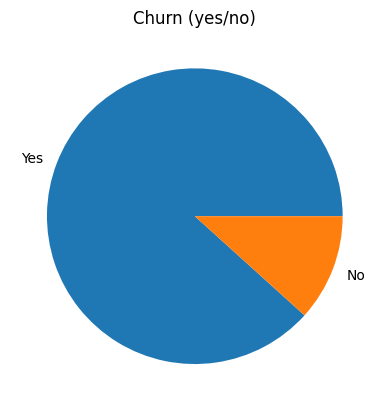

In [18]:
cust_test_data['Churn'].value_counts().plot(kind=('pie'))
plt.title("Churn (yes/no)")
plt.ylabel("")
plt.show()

In [19]:
cust_test_data.groupby('Churn')['MonthlyCharges'].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [20]:
cust_test_data.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [21]:
cust_test_data.groupby('Churn')['Tenure'].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [22]:
cust_test_data.groupby('Churn')['Age'].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


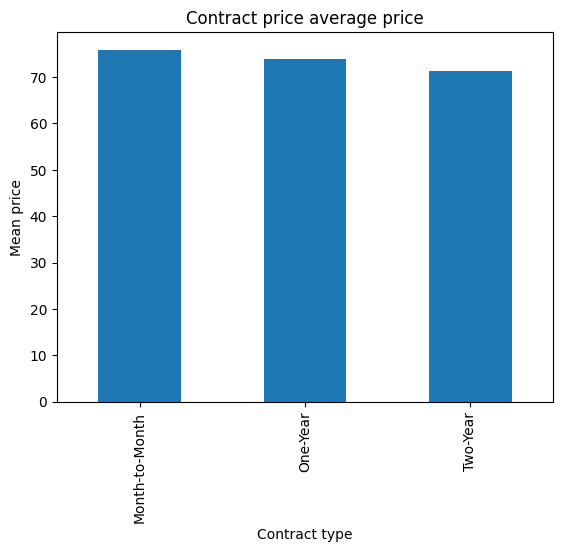

In [28]:
cust_test_data.groupby('ContractType')['MonthlyCharges'].mean().plot(kind="bar")
plt.ylabel("Mean price")
plt.xlabel("Contract type")
plt.title("Contract price average price")
plt.show()

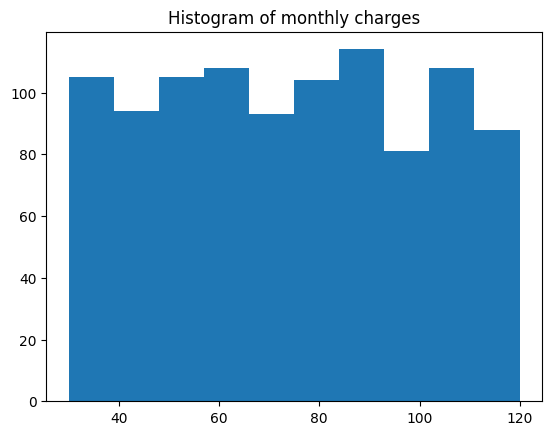

In [29]:
plt.hist(cust_test_data['MonthlyCharges'])
plt.title("Histogram of monthly charges")
plt.show()

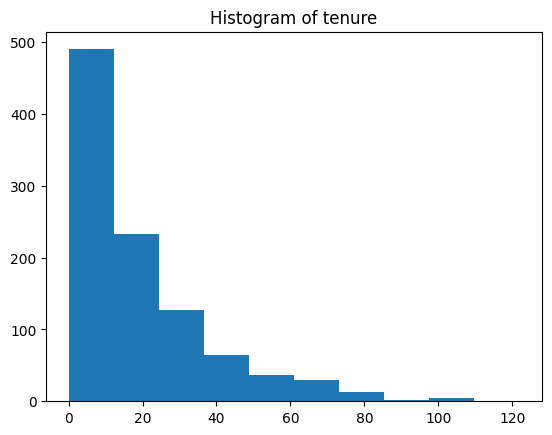

In [30]:
plt.hist(cust_test_data['Tenure'])
plt.title("Histogram of tenure")
plt.show()

In [33]:
y=cust_test_data["Churn"]
x=cust_test_data[["Age","Gender","Tenure","MonthlyCharges",]]

In [39]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [47]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [38]:
x['Gender']=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)

/tmp/ipython-input-4108691191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)


In [42]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [48]:
y.head(2)

,Churn
0,Yes
1,Yes


In [41]:
type(x['Gender'][0])

numpy.int64

In [53]:
# if y is a Series (which it is)
y = y.apply(lambda x: 1 if x == "Yes" else 0)


In [54]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [57]:
type(y[0])

numpy.int64

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
x_train=scaler.fit_transform(x_train)

In [67]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [70]:
x_test=scaler.fit_transform(x_test)

In [82]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [77]:
log_model=LogisticRegression()

In [78]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred=log_model.predict(x_test)

In [83]:
modelperformance(y_pred)

Accuracy score on model is 0.87


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [87]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [88]:
knn = KNeighborsClassifier()


In [89]:
gridknn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [91]:
gridknn.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [93]:
 gridknn.best_params_


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [94]:
y_pred=gridknn.predict(x_test)

In [95]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [96]:
from sklearn.svm import SVC

In [97]:
svm=SVC()

In [103]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [104]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [105]:
gridsvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [106]:
gridsvc.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [108]:
y_pred=gridsvc.predict(x_test)

In [109]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
    }

In [112]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [114]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [116]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [117]:
y_pred=grid_tree.predict(x_test)

In [118]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [119]:
modelperformance(y_pred)

Accuracy score on model is 0.84


In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [123]:
param_grid={
    "n_estimators": [32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [125]:
grid_rfc=GridSearchCV(rfc_model,param_grid,cv=5)

In [126]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [127]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [128]:
y_pred=grid_rfc.predict(x_test)

In [129]:
modelperformance(y_pred)

Accuracy score on model is 0.845


In [133]:
best_model=gridsvc.best_estimator_

In [136]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [137]:
x.columns


Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [138]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

scaler = joblib.load("scaler.pkl")
model = joblib.load("model.pkl")

st.title("Churn Prediction App")

age = st.number_input("Enter Age", min_value=18, max_value=100, value=30)
tenure = st.number_input("Enter Tenure", min_value=0, max_value=100, value=12)
monthlycharge = st.number_input("Enter Monthly Charges", min_value=30, max_value=150, value=70)
gender = st.selectbox("Enter Gender", ["Male", "Female"])

gender_encoded = 1 if gender == "Male" else 0

if st.button("Predict"):
    data = np.array([[age, tenure, monthlycharge, gender_encoded]])
    data = scaler.transform(data)
    prediction = model.predict(data)[0]

    if prediction == 1:
        st.error("Customer is likely to CHURN")
    else:
        st.success("Customer is likely to STAY")


Overwriting app.py


In [139]:
!streamlit run app.py


/bin/bash: line 1: streamlit: command not found
